# Financial Inclusion in Africa Starter Notebook

## About:
 
You are asked to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset . You will train your model on 70% of the data and test your model on the final 30% of the data, across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.

The main dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

- [FinAccess Kenya 2018](https://www.fsdkenya.org/publication/finaccess2019/)
- [Finscope Rwanda 2016](https://www.statistics.gov.rw/publication/finscope-rwanda-2016)
- [Finscope Tanzania 2017](https://www.fsdt.or.tz/finscope/)
- [Finscope Uganda 2018](https://fsduganda.or.ug/finscope-2018-survey-report/)

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install lightgbm 

### 1. Load the dataset

In [3]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [4]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [5]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



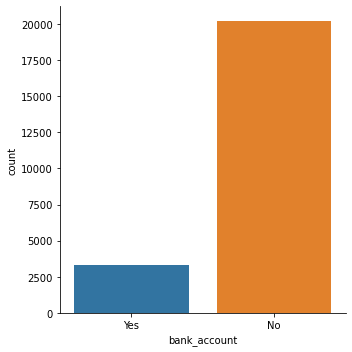

In [7]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train); 

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The `SampleSubmission.csv` gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [8]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


### 2. Understand the dataset
We can get more information about the features presented by using the `info()` method from `pandas`.

In [9]:
 #show some information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [10]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 3. Data Analysis

Before we get into our feature engineering and building machine learning models, lets get some useful insights from our data. We are going to answer the following questions:

- which year where more bank accounts open in kenya?
- which age group opened the most accounts in each country?
- which gender opened the most account in each country?
- is there a relationship betwen the education_level of a persona nd their likelihood to open an account?
- which locatioon_type patronize the banks more?
- what job_type is likely to not open a bank account in Rwanda?
- How many children opened bank accounts in Kenya?
- Which country had the most bank accounts opened in 2016?

### a. which year where more bank accounts open?

In [11]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


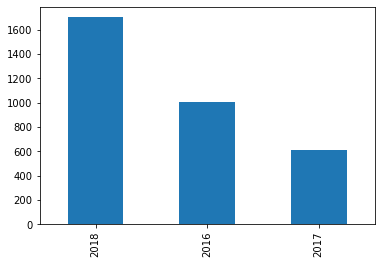

In [12]:
#df of people that opened a bank accounts
yes_df = train[train['bank_account'] == 'Yes']
yes_df['year'].value_counts().plot.bar();

### b. which age group opened the most accounts in each country?

We are going to create a new column where called 'age_group for people within an age bracket.

- 15-39
- 40-69
- 70-100

In [13]:
df = train.copy()

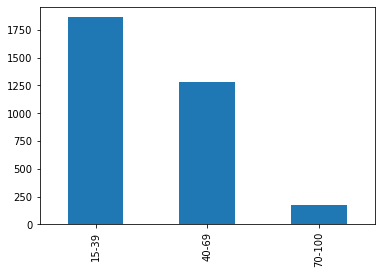

In [14]:
# Define the age groups and corresponding labels
age_groups = [15, 39, 69, 100]
labels = ['15-39', '40-69', '70-100']

# Cut the 'age' column into age groups and assign labels
df['age_group'] = pd.cut(df['age_of_respondent'], bins=age_groups, labels=labels, right=False)

#plot the graph
df['age_group'][df['bank_account']=='Yes'].value_counts().plot.bar();

### c. which gender opened the most account in each country?

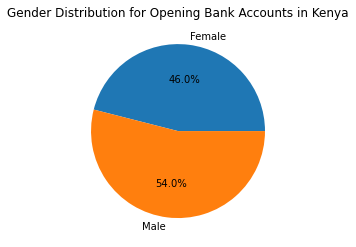

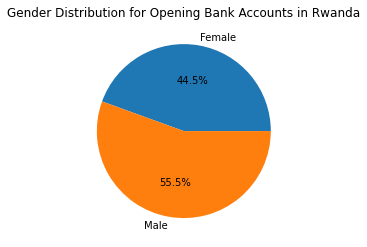

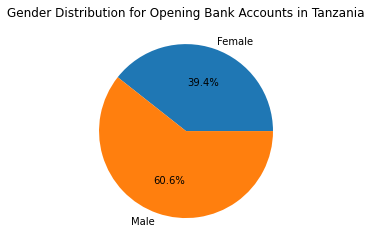

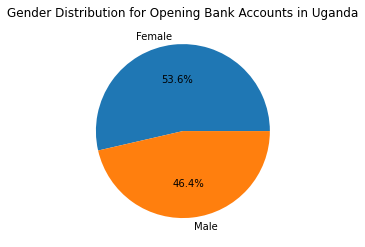

In [15]:
# Group the data by country and gender and calculate the count
gender_counts = yes_df.groupby(['country', 'gender_of_respondent']).size().reset_index(name='count')

# Create a pie chart for each country
countries = yes_df['country'].unique()
for country in countries:
    # Filter the data for the current country
    country_data = gender_counts[gender_counts['country'] == country]

    # Create the pie chart
    labels = country_data['gender_of_respondent']
    sizes = country_data['count']
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f"Gender Distribution for Opening Bank Accounts in {country}");

### d. which locatioon_type patronize the banks more?

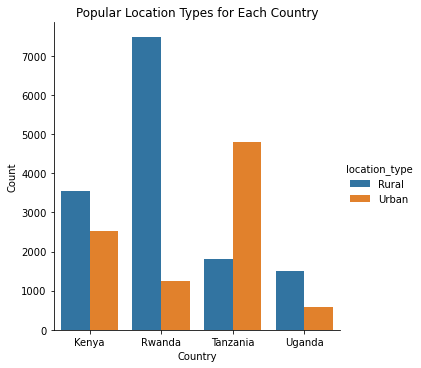

In [16]:
import seaborn as sns

# Create the catplot
sns.catplot(data=df, x='country', hue='location_type', kind='count')

# Set the plot title and axis labels
plt.title('Popular Location Types for Each Country')
plt.xlabel('Country')
plt.ylabel('Count');

### e. what job_type is likely to not open a bank account in Rwanda?

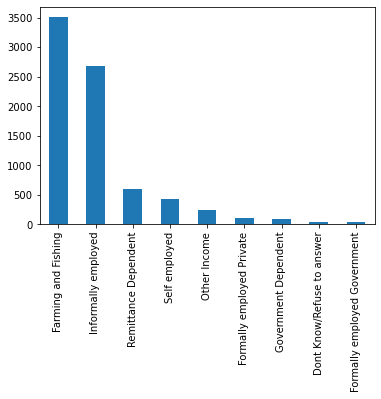

In [17]:
df['job_type'][(df['bank_account'] == 'No') & (df['country'] == 'Rwanda')].value_counts().plot.bar();

### f. is there a relationship betwen the education_level of a persona nd their likelihood to open an account?

In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['education_level'], df['bank_account'])

# Perform chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 3549.125449633797
P-value: 0.0


The chi-square statistic in your analysis is 3549.125 and the corresponding p-value is 0.0.

A p-value of 0.0 indicates that the likelihood of observing the data (or data more extreme) under the assumption of independence between education level and the likelihood to open an account is extremely low.

Therefore, based on these results, we can conclude that there is a significant relationship between the education level of a person and their likelihood to open an account.

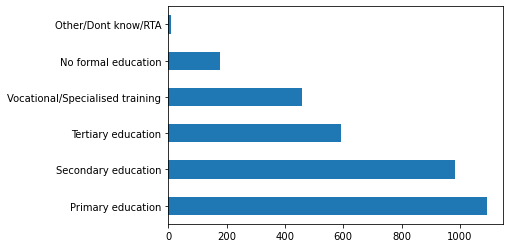

In [19]:
#lets check the educational level that opened the most accounts

yes_df['education_level'].value_counts().plot.barh();

### 4. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

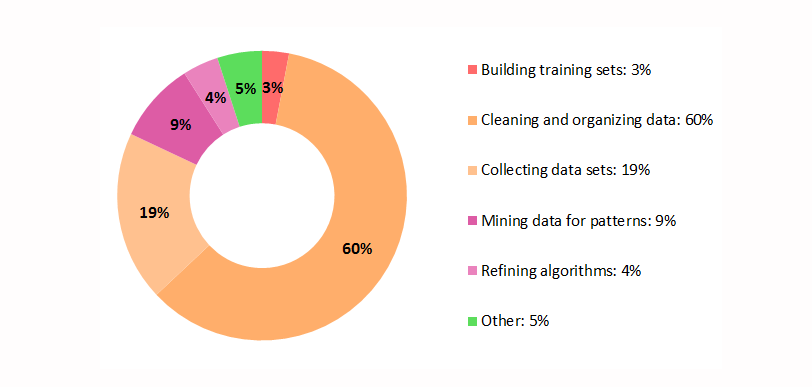


### Resampling our target column:

As it turns out, some clever scientists have come up with various ways to address this so-called class imbalance problem. Here we will discuss two variants of the most common method available: **resampling**.

In [20]:
#resample the target column

yes = train[train['bank_account'] == 'Yes']
no = train[train['bank_account'] == 'No']

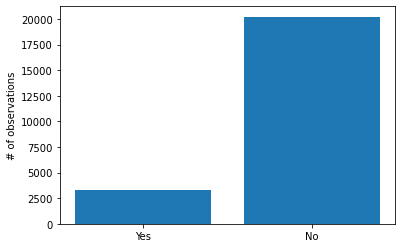

In [21]:
# Get all possible labels
labels = train['bank_account'].unique()
heights = [len(yes),len(no)]
plt.bar(labels,heights)
plt.xticks(labels,['Yes','No'])
plt.ylabel("# of observations")
plt.show()

Now, let's resample!

In [22]:
#set the class size as half of the majority class
class_size=len(no)/2
class_size

10106.0

In [23]:
from sklearn.utils import resample

# Set the class size as half of the majority class
class_size = len(no) // 2

# Upsample the minority class to be as big as the class size
yes_upsampled = resample(yes,
                         replace=True,
                         n_samples=class_size,
                         random_state=27)

# Downsample the majority class to the class size
no_downsampled = resample(no,
                          replace=False,
                          n_samples=class_size,
                          random_state=27)

# Combine upsampled minority class with downsampled majority class
resampled_train = pd.concat([yes_upsampled, no_downsampled])

resampled_train['bank_account'].value_counts()

Yes    10106
No     10106
Name: bank_account, dtype: int64

### Feature Engineering

The first step is to separate the independent variables and target(bank_account) from the train data. Then transform the target values from the object data type into numerical by using [LabelEncoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).


In [41]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
resampled_train['bank_account'] = le.fit_transform(resampled_train['bank_account'])

#Separate training features from target
X_train = resampled_train.drop(['bank_account'], axis=1)
y_train = resampled_train['bank_account']

print(y_train)

4080     1
15535    1
2912     1
5169     1
20958    1
        ..
10756    0
8665     0
16725    0
3419     0
18480    0
Name: bank_account, Length: 20212, dtype: int64


The target values have been transformed into numerical datatypes, **1** represents **‘Yes’** and **0** represents **‘No’**.

We have created a simple preprocessing function to:

*   Handle conversion of data types
*   Convert categorical features to numerical features by using [One-hot Encoder and Label Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)
*   Drop uniqueid variable
*   Perform [feature scaling](https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9).

The processing function will be used for both train and test independent variables.

In [42]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

Preprocess both train and test dataset.

In [43]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

Observe the first row in the train data.

In [44]:
# the first train row
print(processed_train[:1])

[[1.         1.         1.         0.         0.14285714 0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]]


Observe the shape of the train data.

In [28]:
# shape of the processed train set
print(processed_train.shape)

(20212, 37)


Now we have more independent variables than before (37 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

### 4. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [29]:
import sklearn.model_selection

In [45]:
# Split train_data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(processed_train, y_train,
                                                  test_size = 0.2, random_state=42) # stratify = y_train, 

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python). 

We will start by training these models using the train set after splitting our train dataset.

### 4.1 Tree Classification Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

# initialize machine learning models
tree = DecisionTreeClassifier(random_state=42)

#fit the model
tree.fit(X_train, y_train)

#lets predict the label for our test set

model_1= tree.predict(X_val) 

### 4.2   XGBClassifier

In [32]:
#!pip install xgboost

In [47]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_train,y_train)

#predict
model_2 = xg_model.predict(X_val)

### 4.3 Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model on our rebalanced data
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train, y_train)

# Generate predictions
model_3 = lr.predict(X_val)

### 4.4 SVC Model

In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
model_4 = svc.predict(X_val)

### 5. Model Performance

In [50]:
# import evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,f1_score

tree_acc = accuracy_score(y_val, model_1)
xgb_acc = accuracy_score(y_val, model_2)
log_acc = accuracy_score(y_val, model_3)
svc_acc = accuracy_score(y_val, model_4)


acc_dict ={
    "Accuracy":
    {
    "decision_tree":tree_acc,
    "XGB":xgb_acc,
    "logistic_reg":log_acc,
        "SVC":svc_acc
    }
}
results = pd.DataFrame(data=acc_dict)
results

,Accuracy
SVC,0.783082
XGB,0.830819
decision_tree,0.875340
logistic_reg,0.763542


### 7. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

In [37]:
# Get the predicted result for the test Data
test.bank_account = tree.predict(processed_test)

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [38]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [39]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
5407,uniqueid_11542 x Rwanda,0
6487,uniqueid_6762 x Tanzania,0
2824,uniqueid_8959 x Rwanda,0
7865,uniqueid_8140 x Tanzania,0
4748,uniqueid_10883 x Rwanda,0


Save results in the CSV file.


In [51]:
# Create submission csv file csv file
submission.to_csv('2nd_submission.csv', index = False)
#files.download('first_submission.csv') 